# Scoring Model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

np.random.seed(42)

# Creating data
data = {
    'Возраст': np.random.randint(18, 65, 1000),
    'Доход': np.random.randint(20000, 100000, 1000),
    'Количество открытых кредитов': np.random.randint(1, 10, 1000),
    'Кредитная история': np.random.randint(300, 850, 1000),
}

# Adding main feature
data['Одобрение кредита'] = (
    (data['Доход'] > 50000) & 
    (data['Кредитная история'] > 650) & 
    (data['Количество открытых кредитов'] < 5)
).astype(int)

# Creating DF
df = pd.DataFrame(data)

# Test and train sets
X = df[['Возраст', 'Доход', 'Количество открытых кредитов', 'Кредитная история']]
y = df['Одобрение кредита']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regressoin
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

# LIME

In [5]:
from lime.lime_tabular import LimeTabularExplainer

# Creating object LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns.tolist(), 
                                 class_names=['Отклонено', 'Одобрено'],
                                 mode='classification')

# Selecting a specific instance of data to explain
instance_to_explain = X_test.iloc[0].values

# Getting an explanation for this instance
explanation = explainer.explain_instance(instance_to_explain, model.predict_proba)

# Visualizing explanation
explanation.show_in_notebook()

X does not have valid feature names, but LogisticRegression was fitted with feature names


# SHAP

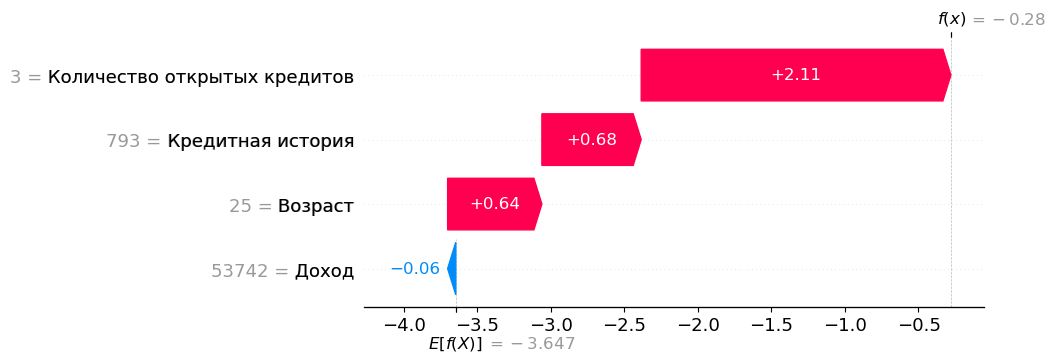

In [10]:
import shap

# SHAP Explanation object 
explainer_shap = shap.Explainer(model, X_train)

# Computing SHAP values for the test set
shap_values = explainer_shap(X_test)

# Visualizing SHAP values for a specific instance
shap.plots.waterfall(shap_values[0])

  0%|          | 0/200 [00:00<?, ?it/s]

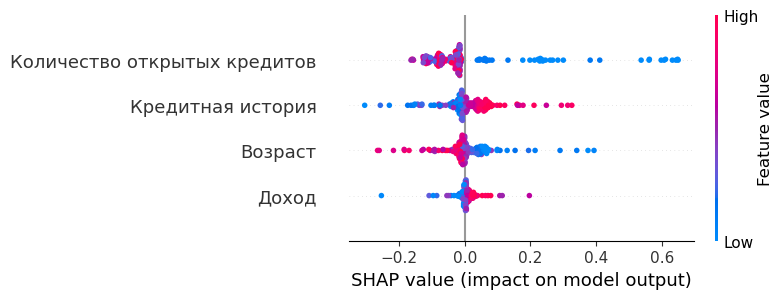

In [11]:
import warnings
warnings.filterwarnings('ignore')

explainer = shap.KernelExplainer(model.predict, shap.sample(X_test, 100))

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [19]:
shap.initjs()

shap_values = explainer.shap_values(X_test.iloc[9,:])

shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[9,:])

In [14]:
shap_values = explainer.shap_values(X_test.iloc[:9,:])

shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:9,:])

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

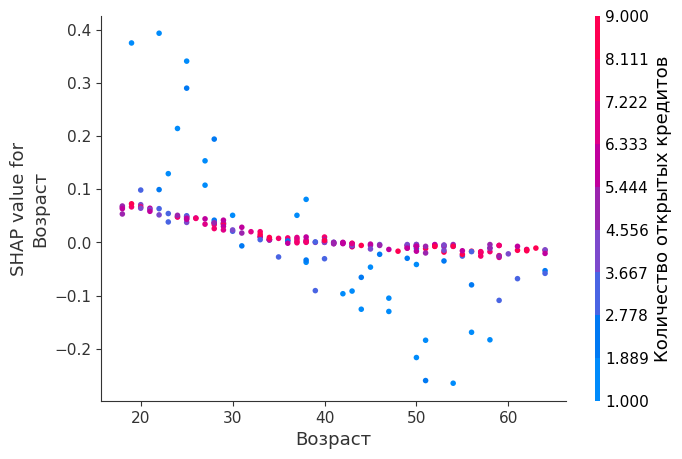

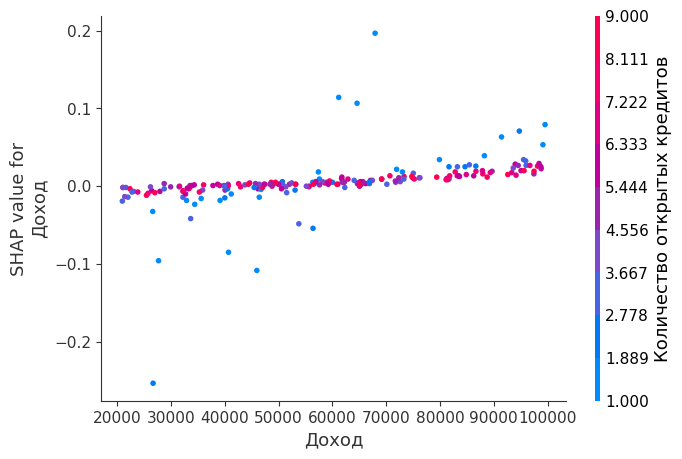

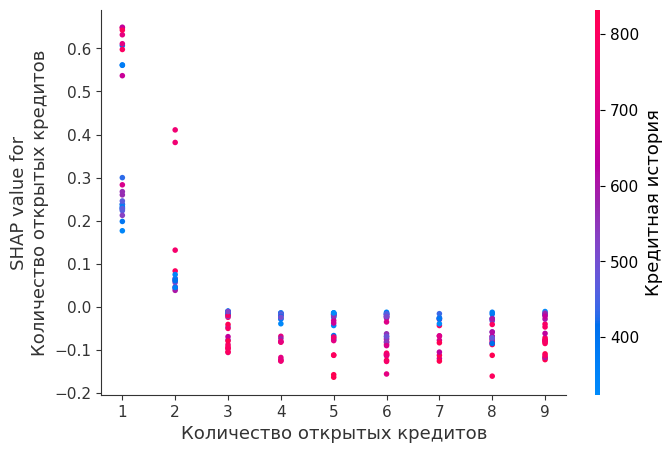

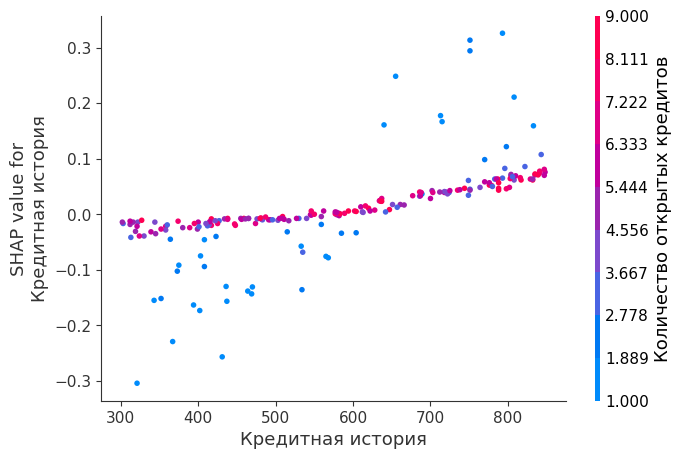

In [18]:
shap_values = explainer.shap_values(X_test)
for name in X_test.columns:
	shap.dependence_plot(name, shap_values, X_test, display_features = X_test)

In [36]:
from shapash import SmartExplainer
from lightgbm import LGBMRegressor

regressor = LGBMRegressor(n_estimators=200).fit(X_train,y_train)

xpl = SmartExplainer(
    model=regressor
)
xpl.compile(x=X_test,
            y_target=y_test
           )


app = xpl.run_app(title_story='Logistic Regression on my Dataset')



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 4
[LightGBM] [Info] Start training from score 0.108750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

INFO:root:Your Shapash application run on http://LAPTOP-TCELAHKB:8050/
INFO:root:Use the method .kill() to down your app.


c:\Users\user\anaconda3\lib\site-packages\shapash\webapp\smart_app.py:1529: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

ERROR:shapash.webapp.smart_app:Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\user